##### Perceived issue
Long-term use of ammonium-based nitrogen fertilizers is acidifying soils across Canada. Falling soil pH reduces nutrient availability, increases toxic metals, and lowers crop performance — forcing farmers (including on the Prairies) to apply lime and incur extra cost.

##### Use Case
Build a data-driven system that predicts when and where fertilizer application will significantly lower soil pH and recommends optimized fertilizer type/amount and liming actions to maintain target pH and maximize yield while minimizing costs and inputs.

##### Null and alternative hypotheses
```Null hypothesis (H₀)```: There is no significant relationship between nitrogen fertilizer application rates (and related management practices) and changes in soil pH or crop yield.

```Alternative hypothesis (H₁)```: Higher rates/frequencies of ammonium-based nitrogen fertilizer applications (or certain management practices) are associated with a statistically significant decline in soil pH and corresponding changes in crop yield.

## Dataset
This dataset contains 2,200 records of soil samples collected from different agricultural regions.
Each record includes several important soil features such as:

N (Nitrogen), P (Phosphorus), and K (Potassium) levels

pH value of the soil (which tells whether it’s acidic or alkaline)

Temperature, humidity, and rainfall information

And the recommended crop type for that soil condition

This dataset helps us understand how soil chemistry changes with fertilizer content and how that might affect crop performance.

### Exploratory  Data Analysis

### Load data 

In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [9]:

 
# Load your dataset
df = pd.read_csv("Data/Crop_recommendationV2.csv")
 
# Display the first few rows to confirm columns
print(df.head())

    N   P   K  temperature   humidity        ph    rainfall label  \
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice   
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice   
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice   
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice   
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice   

   soil_moisture  soil_type  ...  organic_matter  irrigation_frequency  \
0      29.446064          2  ...        3.121395                     4   
1      12.851183          3  ...        2.142021                     4   
2      29.363913          2  ...        1.474974                     1   
3      26.207732          3  ...        8.393907                     1   
4      28.236236          2  ...        5.202285                     3   

   crop_density  pest_pressure  fertilizer_usage  growth_stage  \
0     11.743910      57.607308        188.194958             1   
1     16


Descriptive Statistics:

         Mean     Median       Mode     Variance  Standard Deviation
pH   6.469480   6.425045   3.504752     0.598980            0.773938
N   50.551818  37.000000  22.000000  1362.889537           36.917334


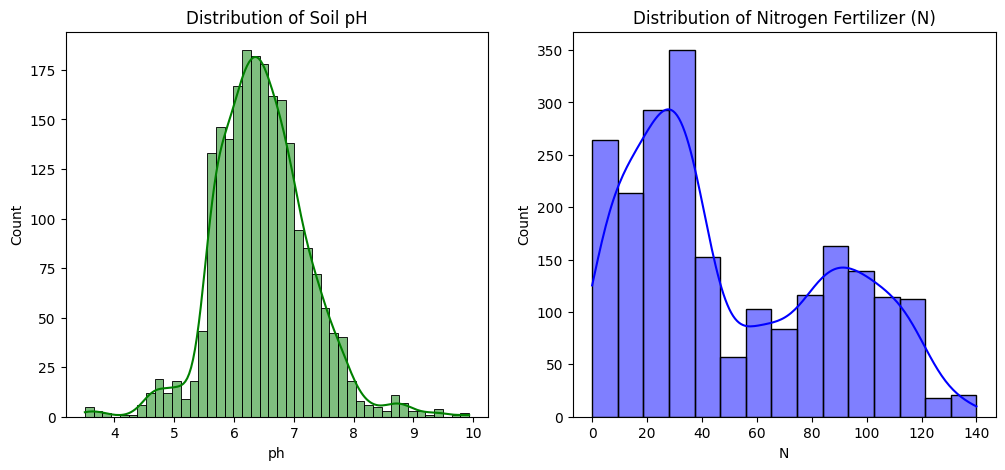


Correlation between Nitrogen (N) and pH: 0.097

Pearson correlation coefficient (r): 0.0967
p-value: 6e-06

Result: Reject the Null Hypothesis (H₀).
Interpretation: Nitrogen fertilizer usage has a statistically significant relationship with soil pH.


In [11]:

# ------------------------------------------------------------
# 4. Descriptive statistics for pH and Nitrogen (N)
# ------------------------------------------------------------
stats_summary = {
    "Mean": [df["ph"].mean(), df["N"].mean()],
    "Median": [df["ph"].median(), df["N"].median()],
    "Mode": [df["ph"].mode()[0], df["N"].mode()[0]],
    "Variance": [df["ph"].var(), df["N"].var()],
    "Standard Deviation": [df["ph"].std(), df["N"].std()]
}

summary_df = pd.DataFrame(stats_summary, index=["pH", "N"])
print("\nDescriptive Statistics:\n")
print(summary_df)

# ------------------------------------------------------------
# 5. Visualization: Distribution of pH and Nitrogen
# ------------------------------------------------------------
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df["ph"], kde=True, color="green")
plt.title("Distribution of Soil pH")

plt.subplot(1, 2, 2)
sns.histplot(df["N"], kde=True, color="blue")
plt.title("Distribution of Nitrogen Fertilizer (N)")
plt.show()

# ------------------------------------------------------------
# 6. Correlation analysis
# ------------------------------------------------------------
correlation = df["N"].corr(df["ph"])
print(f"\nCorrelation between Nitrogen (N) and pH: {correlation:.3f}")

# ------------------------------------------------------------
# 7. Hypothesis Testing: Correlation significance test
# ------------------------------------------------------------
# Pearson correlation test
corr_test = stats.pearsonr(df["N"], df["ph"])
r_value, p_value = corr_test
print("\nPearson correlation coefficient (r):", round(r_value, 4))
print("p-value:", round(p_value, 6))

if p_value < 0.05:
    print("\nResult: Reject the Null Hypothesis (H₀).")
    print("Interpretation: Nitrogen fertilizer usage has a statistically significant relationship with soil pH.")
else:
    print("\nResult: Fail to Reject the Null Hypothesis (H₀).")
    print("Interpretation: There is no statistically significant relationship between nitrogen levels and soil pH.")

